# Data Analysis in Python

## Pandas

Pandas is a python module for data handling and analysis, with it's explicit aim to handle missing data in an elegant way. 

In the following example, we read a `.csv` file into a data frame. We can see that missing data are represented as `NaN` values. 

In [2]:
import pandas as pd

df = pd.read_csv("Prostate_Cancer.csv")
df.head()

,\tlcavol\tlweight\tage\tlbph\tsvi\tlcp\tgleason\tpgg45\tlpsa\ttrain
0,1\t-0.579818495\t2.769459\t50\t-1.38629436\t0\...
1,2\t-0.994252273\t3.319626\t58\t-1.38629436\t0\...
2,3\t-0.510825624\t2.691243\t74\t-1.38629436\t0\...
3,4\t-1.203972804\t3.282789\t58\t-1.38629436\t0\...
4,5\t 0.751416089\t3.432373\t62\t-1.38629436\t0\...


Once data is in a data frame format, quick analyses can be performed.

In [3]:
rain.mean()

Cardiff       97.400000
Stornoway    100.316892
Oxford        54.787500
Armagh        68.803571
dtype: float64

In [6]:
rain.std()

Cardiff      13.615501
Stornoway    14.538920
Oxford        9.383201
Armagh        9.301355
dtype: float64

In [7]:
rain.count()

Cardiff       44
Stornoway    148
Oxford       168
Armagh       168
dtype: int64

<AxesSubplot:>

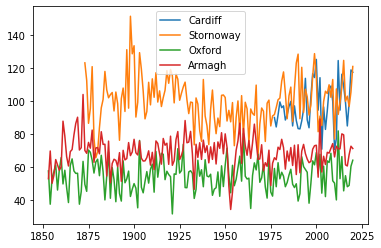

In [8]:
rain.plot()